# Линейная регрессия
Линейная регрессия - очень хорошо изученный метод машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.

_Этот термин в статистике впервые был использован Френсисом Гальтоном (1886) в связи с исследованием вопросов наследования физических характеристик человека. В качестве одной из характеристик был взят рост человека; при этом было обнаружено, что в целом сыновья высоких отцов, что не удивительно, оказались более высокими, чем сыновья отцов с низким ростом. Более интересным было то, что разброс в росте сыновей был меньшим, чем разброс в росте отцов. Так проявлялась тенденция возвращения роста сыновей к среднему (regression to mediocrity), то есть «регресс»._

Итак: 

$$ y = b + \sum_i w_ix_i$$

$$ y = X*w$$ (почему? какого размера матрицы? куда делась b?)

Где:

 - y - 
 - X
 - w
 
 Как будет выглядеть уравнение относительно первого примера?
 
 
 **Функция потерь (Loss function)**
 
 $$L(X,w,y) = \sum_{i=1}^n {(y_i - \sum_iw_i * x_i)}^2  = (y-Xw)^T(y-Xw) $$
 
 
 Не хотим терять! Никто не хочет:) а в математики это еще и решается с помощью простого уравнения, вот бы и в жизни так:)
 
 А что хотим? Хотим чтобы функция потерь принимала минимальное значение, то есть решаем задачу минимизации функции. Отличная новость, мы ничего уже не решаем, все решено до нас. Оптимизационная задача
 
$$L(X,w,y) \rightarrow min $$
$$\frac{\partial L}{\partial w} = 0 \iff w = (X^TX)^{-1}X^Ty $$

Это выражение называется еще нормальное уравнение

### Нормальное уравнение
(просто название, ненормальных не бывает:))

Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

**Отличная новость!** На практике вам вообще все это не понадобится, но давайте пострадаем немножко

### Fake data

Симуляция - отличный способ разобраться с чем бы то ни было. Сначала сделать модель с известными параметрами, а потом восстановить их. Так и поступим

###  Регрессия с одной переменной

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline


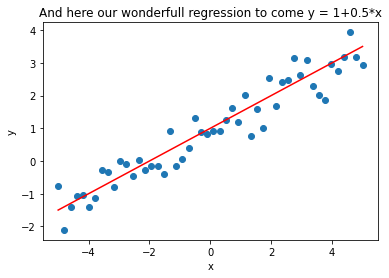

In [ ]:
x=  np.linspace(-5,5,50)
a = 1
b = 0.5
eps = np.random.randn(50)
y = a + b*x + 0.5*eps
plt.scatter(x,y); plt.plot(x, a+b*x, color = 'red');
plt.title(f'And here our wonderfull regression to come y = {a}+{b}*x');
plt.xlabel('x');
plt.ylabel('y');

In [ ]:
def loss_(y,a,b,x):
    loss = np.sum((y - a-b*x)**2)
    return loss

In [ ]:
print(f'Loss for a = {a}, b = {b} is equal to {loss_(y,2,0.5,x)}')

Loss for a = 1, b = 0.5 is equal to 66.4337649229007


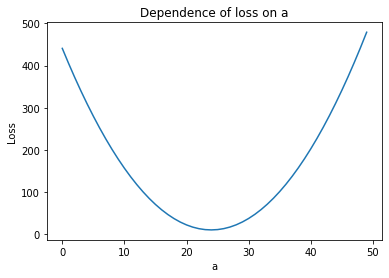

In [ ]:
a_v = np.linspace(-2,4)
loss_v = [loss_(y,a,0.5,x) for a in a_v]
plt.plot(loss_v); plt.title('Dependence of loss on a'); plt.xlabel('a'); plt.ylabel('Loss');

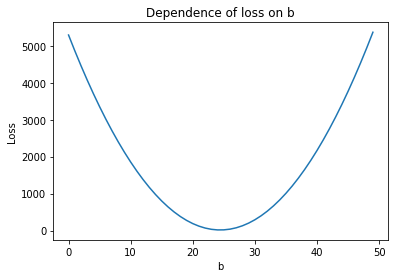

In [ ]:
b_v = np.linspace(-3, 4)
loss_v = [loss_(y,1, b,x) for b in b_v]
plt.plot(loss_v); plt.title('Dependence of loss on b'); plt.xlabel('b'); plt.ylabel('Loss');

###  Найдем решение с помощью нормального уравнения

In [ ]:
X = np.hstack([np.ones((x.shape[0],1)),x[:,np.newaxis]])
norm = np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y))

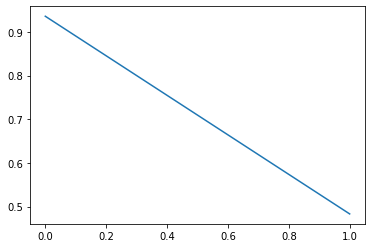

In [ ]:
plt.plot(norm)

###  Оптимизация в scipy  

Вообще задача нахождения минимума функции относится к задачам оптимизации. В данном случае относительная простая задача, поскольку функция выпуклая (и что с того???). Для такой задачи существует много методов оптимизации. Есть специальная функция в scipy которая умеет находить параметры модели

Посмотрим сначала что значит выпуклая

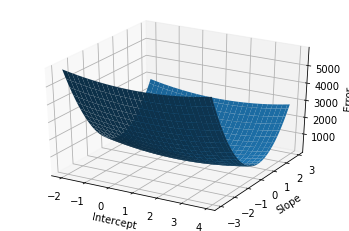

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis
aa = np.arange(-2, 4, 0.1)
bb = np.arange(-3, 3, 0.1)
aa, bb = np.meshgrid(aa,bb)
L = np.zeros(aa.shape) 
for i in range(aa.shape[0]):
    for j in range(aa.shape[1]):
        L[i,j] = loss_(y, aa[i,j],bb[i,j],x)
surf = ax.plot_surface(aa, bb, L)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()        

In [ ]:
def loss_min(w,x,y):
    loss = np.sum((y - w[0]-w[1]*x)**2)
    return loss

In [ ]:
res = (optimize.minimize(loss_min, args=(x,y), x0=(0, 0), method='L-BFGS-B', bounds=((-100, 100), (-5, 5)))).x
print(res)

[0.98096078 0.54311091]


## Задание 1
А теперь все то же самое (график трехмерный рисовать не надо), но сделаем функцию посложней 
$$y = w_0 + w_1*x_1 +w_2*x_2 + w_3*x_1*x_2+w_4*x_1^2 + w_5*x_2^2$$

In [ ]:
from sklearn.datasets import make_friedman1 
import seaborn as sns
import pandas as pd


In [ ]:
(X,Y) = make_friedman1(n_samples = 100, n_features = 5)
print(X.shape, Y.shape)

(100, 5) (100,)


In [ ]:
x1, x2 = X[:, 0], X[:, 1]

In [ ]:
x3 = x1 * x2

In [ ]:
x4 = x1 ** 2

In [ ]:
x5 = x2 ** 2

In [ ]:
x0 = np.ones(x1.shape,)

In [ ]:
X = np.vstack((x0.T, x1.T, x2.T, x3.T, x4.T, x5.T)).T

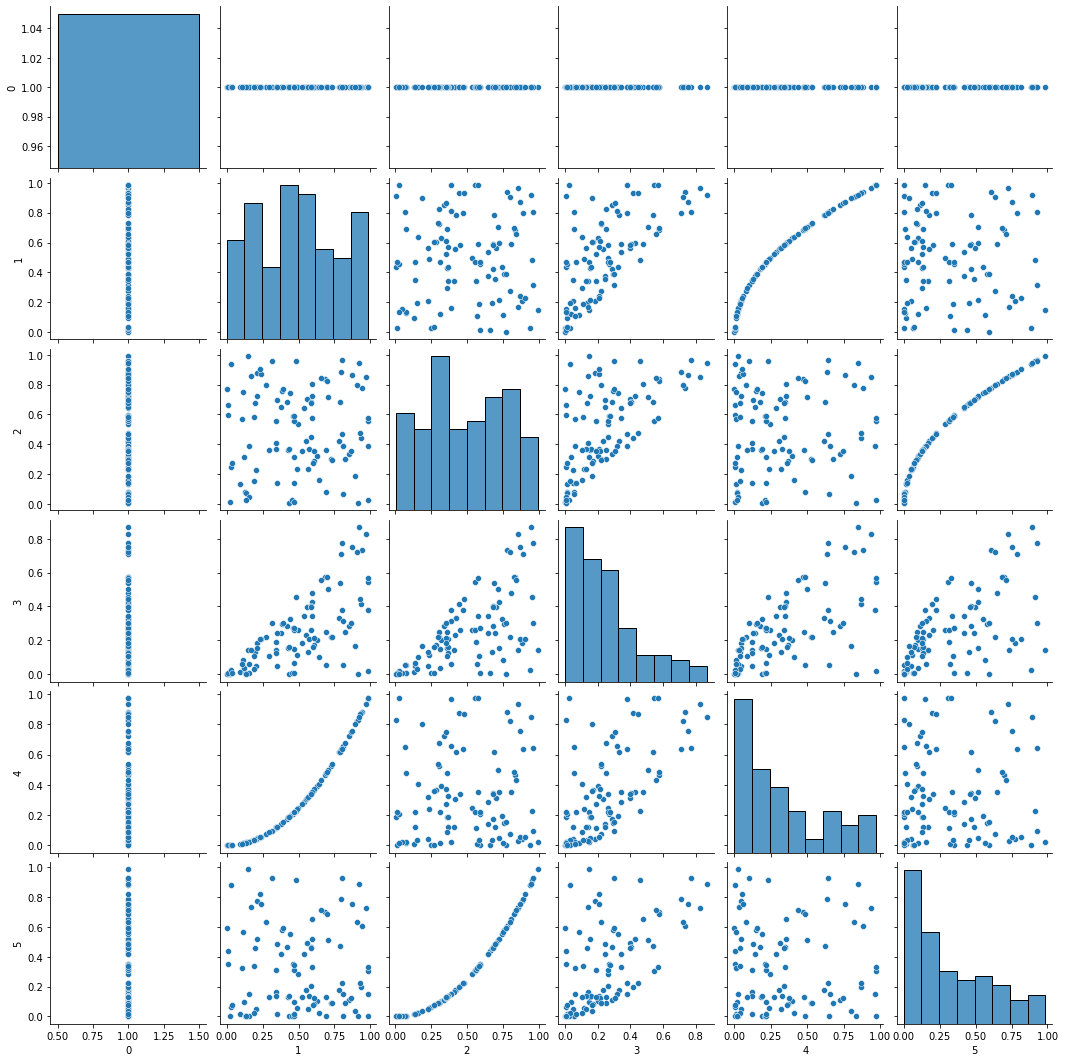

In [ ]:
X = pd.DataFrame(X)
sns.pairplot(X)

In [ ]:
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
print(w)

[  7.26036937   9.37927112  16.0874025    6.59299503  -6.41442804
 -13.30072792]


In [ ]:
def loss_min(w,x,y):
    loss = np.sum((y - w[0] - w[1]*X[:, 1] - w[2]*X[:, 2] - w[3]*X[:, 3] - w[4]*X[:, 4] - w[5]*X[:, 5])**2)
    return loss

In [ ]:
res = (optimize.minimize(loss_min, args=(X,Y), x0=(0, 0, 0, 0, 0, 0), method='L-BFGS-B')).x
print(res)

[  7.26031368   9.3781852   16.08754425   6.59246585  -6.41283299
 -13.30028062]


## Взгляд на линейную регрессию со стороны теории вероятности

Правдоподобие: вероятность наблюдать наши ответы с теми примерами которые есть при заданном параметре W
$$L(W) = p(y|X;W)$$

Теперь супер трюк: считаем что каждый пример сам по себе и не зависит от остальных, тогда мы можем представить вероятность как произведение

$$L(W) = \prod p(y_i|x_i;W)$$

Что такое $p(y_i|x_i;W)$? 
Тут приходит на помощь центральная предельная теорема. Мы считаем, что ошибки в данных случайные и независимые, тогда $ y_i = Wx_i +e_i \sim N(Wx, \sigma)$, a $$p(y|x_i;W)=\frac{1}{\sqrt{2\pi\sigma}}\frac{\exp-(y_i - W^Tx)^2}{2\sigma^2}$$

Получается произведение кучи членов. Но! если мы возьмем логарифм от функции, то положение максимума не изменится (???). И (надо доделать выкладки)  получаем функцию, которую надо минимизировать (минимизировать, был же максимум???)
$$log L(W) = C+\sum_{i=1}^n {(y_i - \sum_iw_i * x_i)}^2 $$


## R^2

Ну мы уже ввели лося и понимаем как оценивать качество, но вы возьмете другую функцию и никак не получится сравнить одно с другим. Нужна какая то другая мера хорошести аппроксимации.
И ее опять придумали за нас.

$$R^2 = 1 - \frac{\sum_i(y-y_{pred})^2}{\sum_i(y-y_{mean})^2}$$

 - и какой смысл?
 - каким может быть показатель?
 - какой он в лучшем случае?
 - какой в худшем?

In [ ]:
def r_squared(y_pred,y):
    rel = np.sum((y-y_pred)**2)/np.sum((y-np.mean(y))**2)
    return 1-rel

In [ ]:
res = res[:, np.newaxis]
y_pred = np.dot(X, res)

In [ ]:
r_squared(y_pred, Y)

-135.94238448913592

In [ ]:
print(f'For true set of parameters {r_squared(1+0.5*x,y):.2f}, for esimated {r_squared(0.86+0.5*x,y):.2f}')

For true set of parameters 0.91, for esimated 0.91


## А теперь магия маленькой черной коробочки!!!

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Betty_Boop_patent_fig1.jpg/340px-Betty_Boop_patent_fig1.jpg" alt="Drawing" style="width: 100px;"/>


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#хоп и фит  
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#а это что?
reg.score(X, Y)

0.4495639441071383

In [ ]:
#а тут что за ноль?
reg.coef_

array([  0.        ,  23.46668421,  10.51867995,   1.92142168,
       -14.05194886,  -4.40133245])

In [ ]:
reg.intercept_

3.3556918087490377

### Задание 2
Сделайте для регрессии из прошлого занятия, подумайте как можно сгенерировать признаки, чтобы лучше аппроксимировалось

In [ ]:
reg = LinearRegression(fit_intercept = False)
reg.fit(X,Y)

In [ ]:
reg.score(X, Y)

In [ ]:
reg.coef_

### Задание 3

Оцените регрессию для реальных данных: Boston dataset:
 -  сделайте визуализацию
 - получите решение с помощью нормального уравнения
 - решение с помощью   sklearn

Самостоятельно (можно с Олей): про нормализацию данных (смотрите книжку, видео, лекции у  A.Mueller)

In [ ]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
y = y[:, np.newaxis]
cols = ['crime rate', 'residential land zoned', 'non-retail business', 'Charles River?', 'nitrogen oxides concentration', 'rooms per dwelling', 'owner-occupied units built prior to 1940', 'distances to five Boston employment centres', 'radial highways', 'tax', 'pupil-teacher ratio', 'blacks', 'lower status of the population', 'median value']
b = pd.DataFrame(np.hstack((X, y)), columns=cols)

NameError: ignored

In [ ]:
b.head()

In [ ]:
sns.pairplot(b)

In [ ]:
reg = LinearRegression(fit_intercept=False, normalize=True)
reg.fit(X,y)

In [ ]:
reg.score(X, y)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
# просто попытка посмотреть на веса без е-01....
norm_vesa = pd.DataFrame(reg.coef_, columns=cols[:13])
norm_vesa

In [ ]:
b_pred = np.dot(X, reg.coef_.T)
r_squared(b_pred, y)

In [ ]:
vesa = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
b_pred_normik = np.dot(X, vesa)
r_squared(b_pred_normik, y)

## Регуляризация
Часто в данных мы можем наблюдать так называемую мультиколлинеарность — когда два или несколько признаков сильно коррелированы, в матрице  это проявляется в виде "почти" линейной зависимости столбцов. 

In [ ]:
import pandas as pd
import seaborn as sns


In [ ]:
x1 =  np.linspace(-5,5,50)
x2 = np.random.randn(50)
x3 = 0.3*x1+0.2*x2 + 0.03*np.random.randn(50)
W = np.array([1,1,2,0.5])
eps = np.random.randn(50)
y = W[0] + W[1]*x1 + W[2]*x2+W[3]*x3+0.5*eps

In [ ]:
X = np.hstack([np.ones((x1.shape[0],1)),x1[:,np.newaxis],x2[:,np.newaxis],x3[:,np.newaxis],y[:,np.newaxis]])
df = pd.DataFrame(X, columns=['Intcpt','x1','x2','x3','y'])

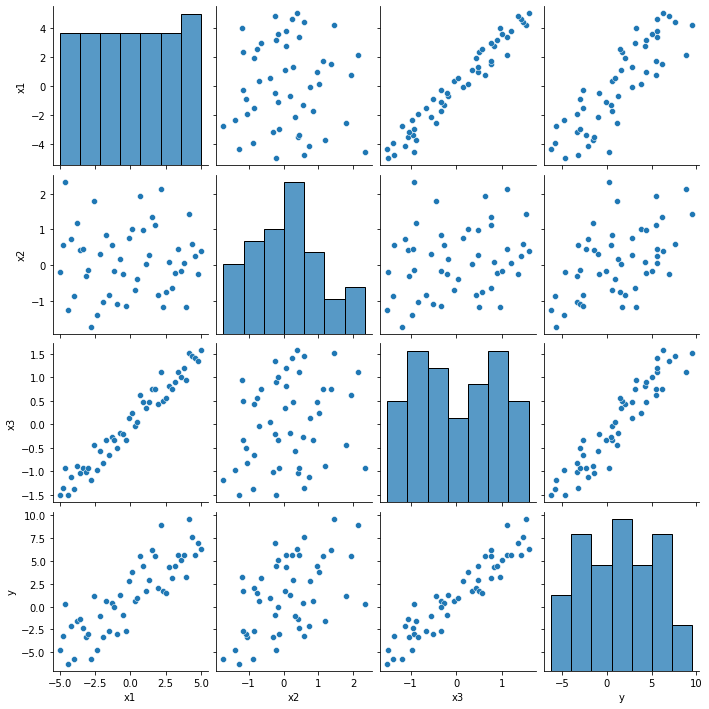

In [ ]:
sns.pairplot(df.iloc[:,1:])

Решение с помощью нормального уравнения

In [ ]:
X = X[:,:-1]
n_coefs = np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y))
list(zip(df.columns[:-1], n_coefs))

[('Intcpt', 1.0160379250277898),
 ('x1', -0.0026843266890758007),
 ('x2', 1.328289131263567),
 ('x3', 3.882499433644811)]

In [ ]:
from sklearn.linear_model import Lasso, Ridge,ElasticNet 

In [ ]:
X = np.hstack([x1[:,np.newaxis],x2[:,np.newaxis],x3[:,np.newaxis]])

In [ ]:
reg = Lasso()
reg.fit(X,y)
print(reg.coef_, reg.intercept_, reg.score(X, y))

[-0.06343729  0.04916467 -0.          0.         -0.          0.9498107
  0.02090951 -0.66879     0.26420643 -0.01521159 -0.72296636  0.00824703
 -0.76111454] [41.05693374] 0.6825842212709925


In [ ]:
reg = Lasso(alpha = 0.3)
reg.fit(X,y)
print(reg.coef_, reg.intercept_, reg.score(X, y))

[1.12749281 1.78872353 0.        ] 1.0356682244668272 0.9754658393056982


In [ ]:
reg = Ridge()
reg.fit(X,y)
print(reg.coef_, reg.intercept_, reg.score(X, y))

[0.92692229 1.91563052 0.77292707] 1.0077209985643738 0.98218037357351


In [ ]:
reg = ElasticNet()
reg.fit(X,y)
print(reg.coef_, reg.intercept_, reg.score(X, y))

[1.0410774  1.01679497 0.02458361] 1.1201231022607503 0.9075012454534513


## Задание 4. 
Для данных по Бостонской недвижимости (или других данных) оцените разные линейный модели с регуляризацией и без. Попробуйте подобрать параметры регуляризации. 

In [ ]:
reg = Lasso(fit_intercept=False, normalize=True)
reg.fit(X,y)
print(reg.coef_, reg.intercept_, reg.score(X, y))

[-0.05447639  0.04807717  0.          0.          0.          4.10641268
  0.03181277 -0.27104961  0.09063498 -0.00692123 -0.08497132  0.01601536
 -0.55817918] 0.0 0.6744912395030842


In [ ]:
# альфа - штрафная добавка
reg = Lasso(fit_intercept=False, normalize=True, alpha = 0.03)
reg.fit(X,y)
print(reg.coef_, reg.intercept_, reg.score(X, y))

[-0.09155461  0.04923704 -0.01283261  2.33671685 -0.          5.7582979
 -0.00857175 -0.92700263  0.17366237 -0.01013352 -0.38775092  0.01478276
 -0.43422554] 0.0 0.71312289603834


In [ ]:
reg = Ridge(fit_intercept=False, normalize=True)
reg.fit(X,y)
print(reg.coef_, reg.intercept_, reg.score(X, y))

[[-0.09271084  0.04905455 -0.00874646  2.75501971 -1.87288907  5.86819274
  -0.00787895 -0.9591962   0.17184488 -0.00960388 -0.38955708  0.01487718
  -0.42214838]] 0.0 0.7136796967109764
